In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df_lyrics = pd.read_csv('lyrics.csv')
df_lyrics.head()

,index,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


In [3]:
df_lyrics.shape

(362237, 6)

In [4]:
df_lyrics.isnull().sum()

index         0
song          2
year          0
artist        0
genre         0
lyrics    95680
dtype: int64

In [5]:
df_lyrics = df_lyrics.dropna(axis=0)
df_lyrics.isnull().sum()

index     0
song      0
year      0
artist    0
genre     0
lyrics    0
dtype: int64

In [6]:
df_lyrics.shape

(266556, 6)

In [7]:
df_lyrics.describe(include='all')

,index,song,year,artist,genre,lyrics
count,266556.000000,266556,266556.000000,266556,266556,266556
unique,NaN,187186,NaN,14543,12,244873
top,NaN,intro,NaN,dolly-parton,Rock,INSTRUMENTAL
freq,NaN,190,NaN,744,109235,1369
mean,181938.409760,NaN,2007.654909,NaN,NaN,NaN
std,104125.770697,NaN,10.115249,NaN,NaN,NaN
min,0.000000,NaN,67.000000,NaN,NaN,NaN
25%,92455.750000,NaN,2006.000000,NaN,NaN,NaN
50%,182105.500000,NaN,2007.000000,NaN,NaN,NaN
75%,272055.250000,NaN,2010.000000,NaN,NaN,NaN


In [10]:
instrumental_list = ['INSTRUMENTAL',
                     'Instrumental',
                     '[Instrumental]',
                     '[instrumental]',
                     '(instrumental)',
                     '(Instrumental)',
                     'instrumental']
df_lyrics = df_lyrics[~df_lyrics['lyrics'].isin(instrumental_list)]
df_lyrics.describe(include='all')

,index,song,year,artist,genre,lyrics
count,262944.000000,262944,262944.000000,262944,262944,262944
unique,NaN,184449,NaN,14533,12,244866
top,NaN,intro,NaN,dolly-parton,Rock,[** feat. Philip Lawrence:]\nHer Heart Is Raci...
freq,NaN,154,NaN,744,107914,57
mean,181857.882937,NaN,2007.662251,NaN,NaN,NaN
std,104139.226052,NaN,10.170418,NaN,NaN,NaN
min,0.000000,NaN,67.000000,NaN,NaN,NaN
25%,92316.750000,NaN,2006.000000,NaN,NaN,NaN
50%,182053.500000,NaN,2007.000000,NaN,NaN,NaN
75%,271900.250000,NaN,2010.000000,NaN,NaN,NaN


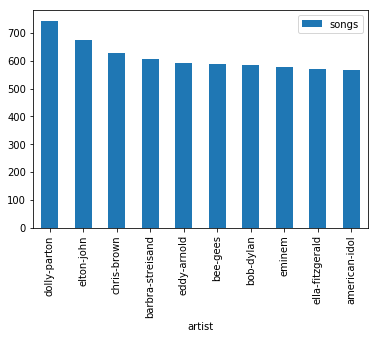

In [11]:
df_top_artists = df_lyrics.groupby('artist').size().sort_values(ascending=False).reset_index(name='songs').head(10)
df_top_artists.plot(x='artist', y='songs', kind='bar')

plt.show()

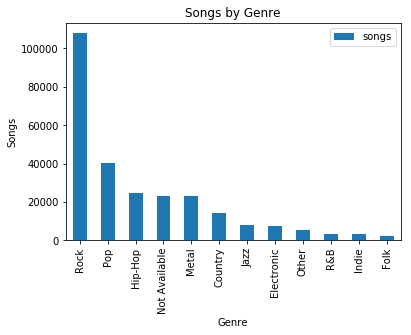

In [12]:
df_genre_count = df_lyrics.groupby('genre').size().sort_values(ascending=False).reset_index(name='songs')
df_genre_count.plot(x='genre', y='songs', kind='bar')

plt.title('Songs by Genre')
plt.xlabel('Genre')
plt.ylabel('Songs')
plt.show()